# Plotting with ggplot (plotnine)

Shahryar Noei, based on R codes by Marco Chierici

April 23, 2025

In [1]:
!pip install plotnine
!pip install pydataset

# Intro

In contrast to basic graphics, `ggplot2` allows the user to add, remove or alter components in a plot at a high level of abstraction.

This abstraction comes at a cost: the way you make plots in `ggplot2` is very different from base graphics making the learning curve steep.

One potential limitation of base R graphics is the "pen-and-paper model" utilized to populate the plotting device.

The distinctive feature of the `ggplot2` framework is the way you make plots through adding *layers*. As such, `ggplot2` allows for a high degree of modularity; the same underlying data can be transformed by many different scales or layers.

# The components of the Grammar of Graphics

The Grammar of Graphics is based on the idea that you can build every graph from the same few components.

The essential building blocks are:

- **Data**: the data frame, or data frames, we will use to plot
- **Aesthetics** (mapping): the variables we will be working with
- **Geometries**: the type of visualization
- **Axes and theme adjustments**: size, text, colors etc

Further elements, which are related to visual adjustments, are:

- Statistics
- Scales
- Facets
- Coordinates
- Theme

In this session, we will mainly focus on the **data**, the **mapping**, the **statistics**, the **geometries** and the **theme**.

# The ggplot syntax

The syntax for constructing ggplots could be puzzling if you are a beginner or work primarily with base graphics. The main difference is that, unlike base graphics, ggplot works with dataframes (tibbles) and not individual vectors. All the data needed to make the plot is typically contained within the dataframe supplied to the `ggplot()` call itself or can be supplied to the respective geometries.

The second noticeable feature is that you can keep enhancing the plot by adding more layers (and themes) to an existing plot created using the `ggplot()` function.

For our first example, we use the `msleep` dataset, which contains data about mammals' sleeping patterns. You can find out about the dataset with `?msleep`.

Let's start with specifying where the **data** comes from in the `ggplot()` function:

In [2]:
from pydataset import data
msleep = data('msleep')
msleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
2,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
5,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


This is not very interesting: nothing is produced!

We need to tell ggplot2 *what* we want to visualise, by **mapping** *aesthetic elements* (like our axes) to *variables* from the data. We want to visualize how common different conservation statuses are, so let's associate the right variable to the x axis:

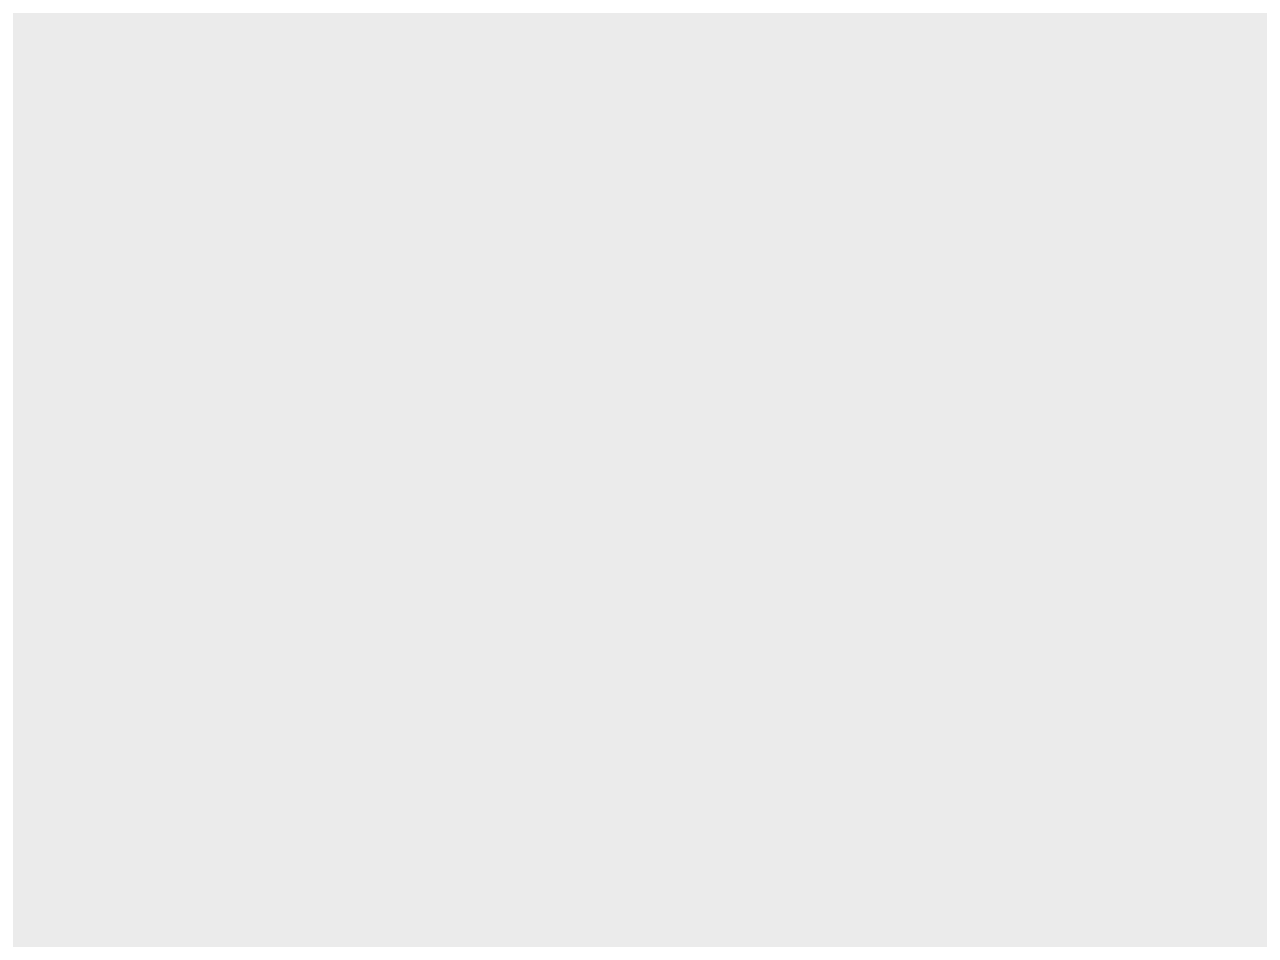

In [3]:
from plotnine import ggplot, aes, geom_bar
ggplot(msleep)

ggplot2 has done what we asked it to do: the conservation variable is on the x axis. But **still nothing is shown** on the plot area. This is because ggplot doesn't assume that you meant a scatterplot or a line chart to be drawn. 
I have only told ggplot what data to use and what column should be used for the X axis.
I haven’t explicitly asked it to draw any points.
Also note that the `aes()` function is used to specify the X (and Y) axes: any information that is part of the source dataframe has to be specified inside the `aes()` function.

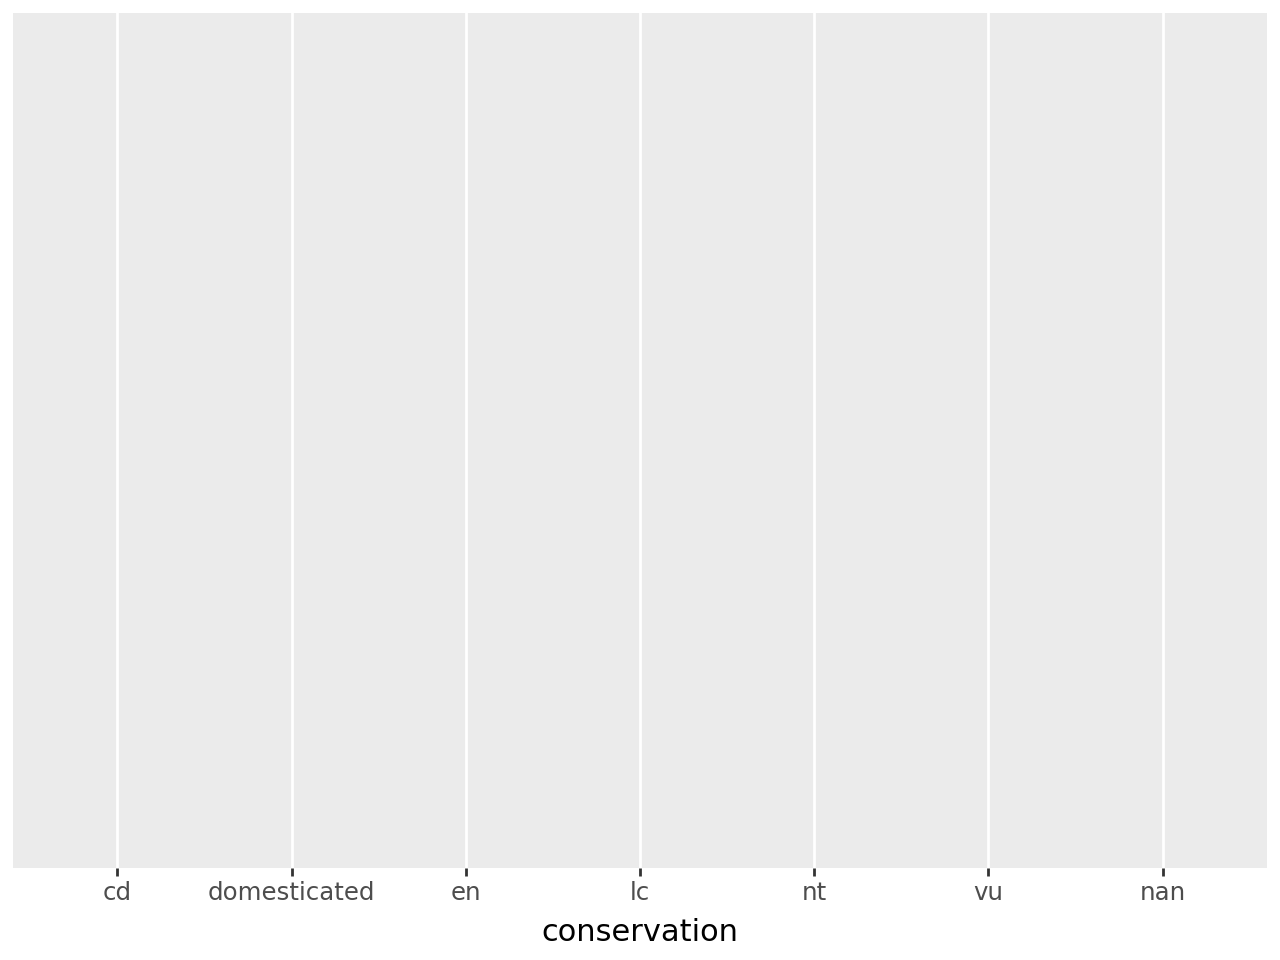

In [4]:
ggplot(data = msleep, mapping = aes(x = 'conservation'))

ggplot2 has done what we asked it to do: the conservation variable is on the x axis. But **still nothing is shown** on the plot area. This is because ggplot doesn't assume that you meant a scatterplot or a line chart to be drawn. 
I have only told ggplot what data to use and what column should be used for the X axis.
I haven’t explicitly asked it to draw any points.
Also note that the `aes()` function is used to specify the X (and Y) axes: any information that is part of the source dataframe has to be specified inside the `aes()` function.

To get an actual plot, we need to define *how* to represent the data, with a *geometry* function  (`geom_*`):

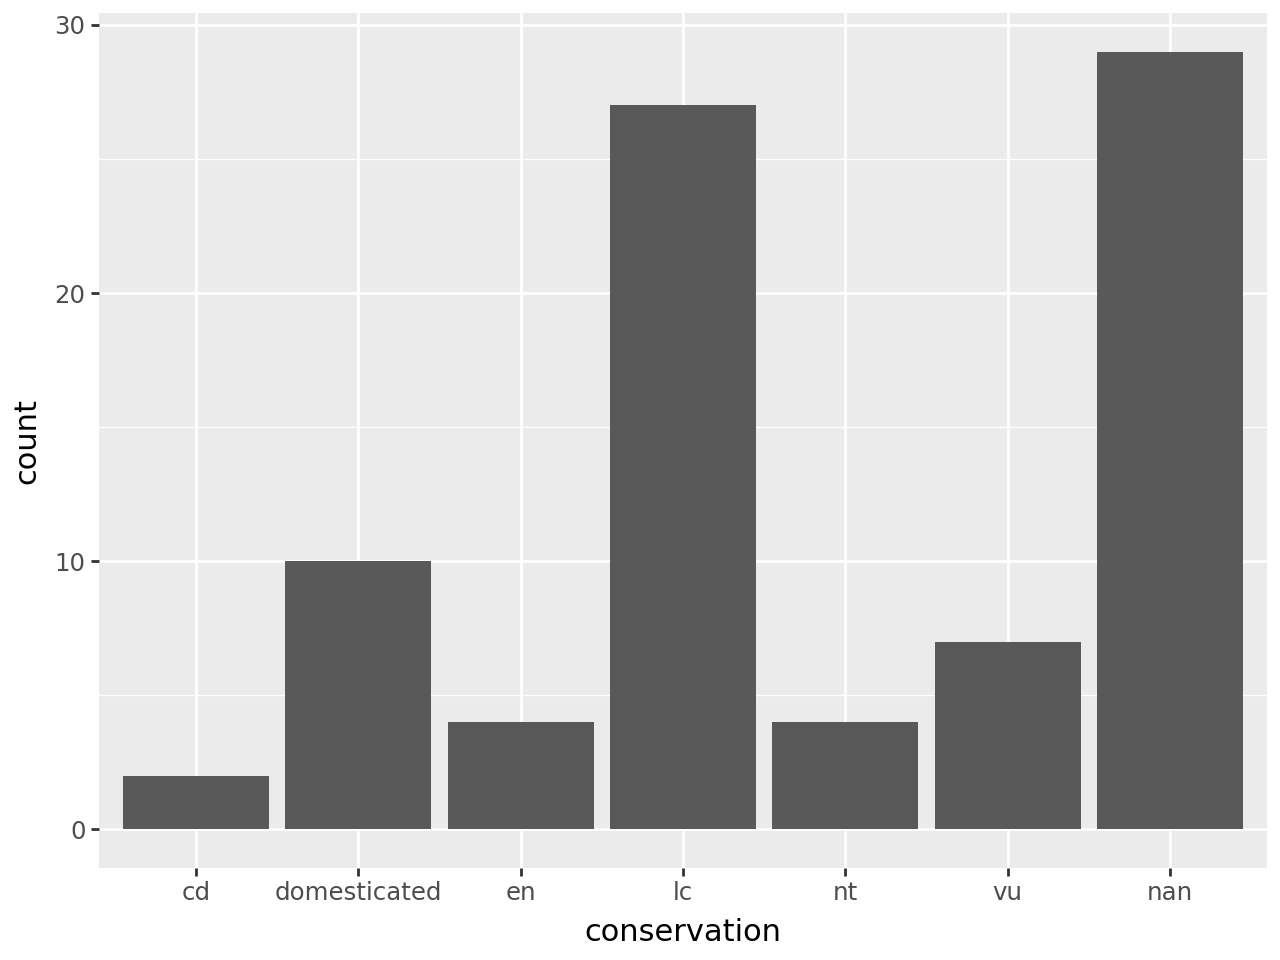

In [5]:
ggplot(data = msleep, mapping = aes(x = "conservation")) + geom_bar()

Now we have a useful plot! 

We can see that a lot of animals in this dataset don't have a conservation status, and that "least concern" (`lc`) is the next most common value.

We can see our three essential elements in the code:

1. the **data** comes from the `msleep` object;
1. the variable `conservation` is **mapped to the aesthetic** `x` (i.e. the x axis);
1. the **geometry** is `"bar"`, for "bar chart".

Here, we don't need to specify what variable is associated to the y axis, as the "bar" geometry automatically does a count of the different values in the `conservation` variable. That is what **statistics** are applied automatically to the data.

In ggplot2, each geometry has default statistics, so we often don't need to specify which stats we want to use. We could use a `stat_*()` function instead of a `geom_*()` function, but most people start with the geometry (and let ggplot2 pick the default statistics that are applied).

There are `geom_*` functions for a wide range of geometries, including histograms, boxplots, polygons, etc.

## ggplot2's essential components: recap

### Data

The first building block for our plots are the data we intend to map. In `ggplot2`, we always have to specify the object where our data lives. In other words, you will always have to specify a data frame, as such:


ggplot(name_of_your_df)


In the future, we will see how to combine multiple data sources to build a single plot. For now, we will work under the assumption that all your data live in the same object. 

### Aesthetics 

The second building block for our plots are the aesthetics. We need to specify the variables in the data frame we will be using and what role they play. 

To do this we will use the function `aes()` within the `ggplot()` function after the data frame.


ggplot(name_of_your_df, aes(x = your_x_axis_variable, y = your_y_axis_variable))


Beyond your axis, you can add more aesthetics representing further dimensions of the data in the two dimensional graphic plane, such as: size, color, fill, to name a few.


### Geometry 

The third layer to render our graph (to make it a specific type of graph, e.g. bar plot, scatter plot, etc.) is a geometric object. To add one, we need to add a plus (**+**) at the end of the initial line and state the type of geometric object we want to add, for example, `geom_point()` for a scatter plot, or `geom_bar()` for bar plots. For an overview of the most important functions and geoms available through `ggplot2`, see the `ggplot2` [cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf).


ggplot(name_of_your_df, aes(x = your_x_axis_variable, y = your_y_axis_variable)) +
  geom_point()


### Axes and themes

At this point our plot may just need some final touches. We may want to fix the axes names or get rid of the default gray background. To do so, we need to add an additional layer preceded by a plus sign (+). 

If we want to change the names in our axes, we can utilize the `labs()` function. 

We can also employ some of the pre-loaded themes, for example, `theme_minimal()`.

```{r, eval=FALSE}
ggplot(name_of_your_df, aes(x = your_x_axis_variable, y = your_y_axis_variable)) +
  geom_point() +
  labs(x = "Name you want displayed",
       y = "Name you want displayed") +
  theme_minimal()
```

# More geometric shapes

Elaborating on this basic workflow, you can use `ggplot2` to create almost any kind of plot. Some plots require an `x` and `y` mapping (two-variable plots), like scatterplots, while others require just an `x` mapping (one-variable plots), like histograms.

In [6]:
import pandas as pd
mpg = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


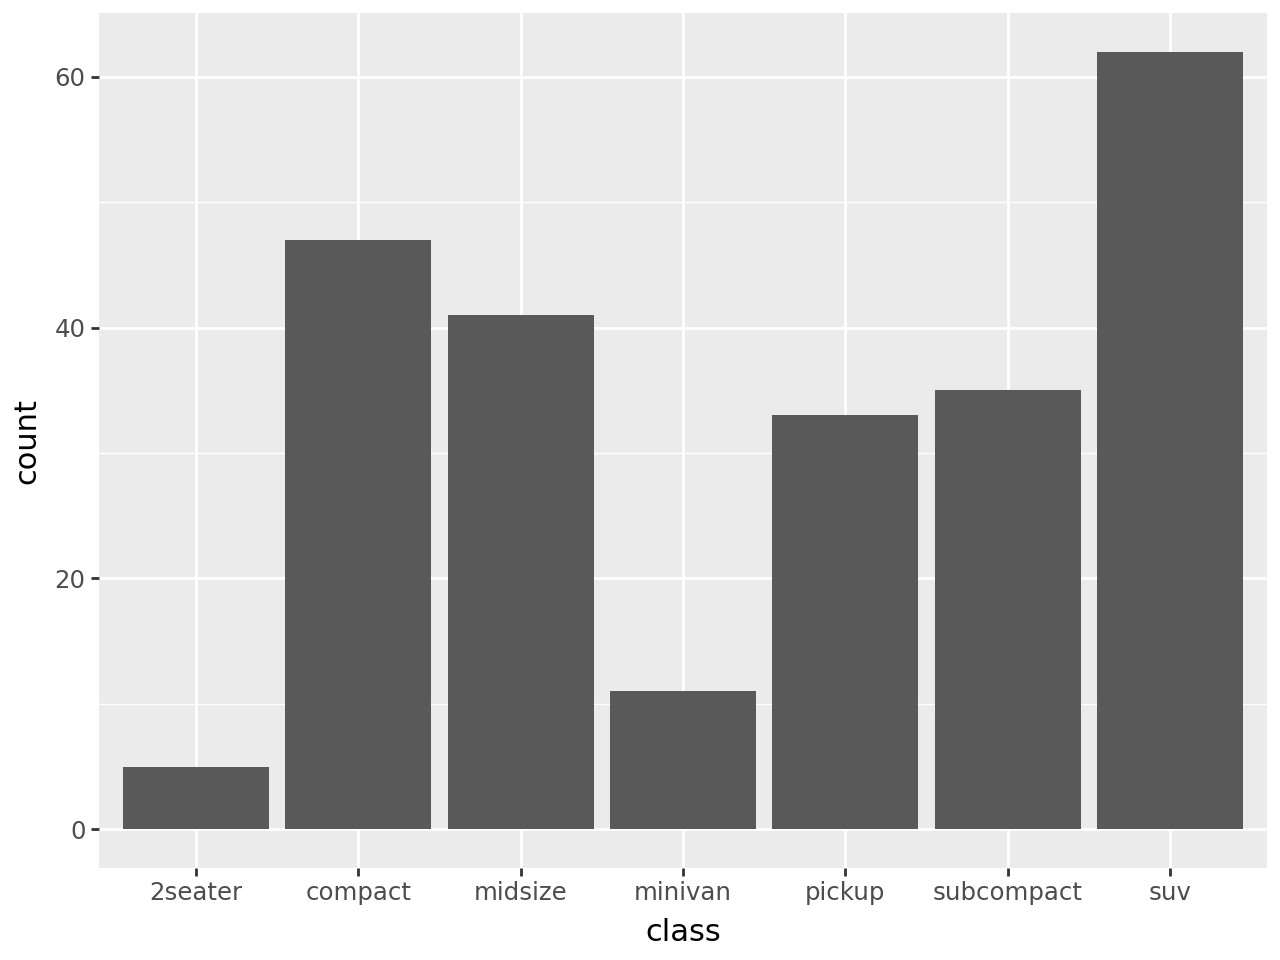

In [7]:
from plotnine import  geom_point, geom_histogram
ggplot(mpg, aes(x="class")) + geom_bar()


/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


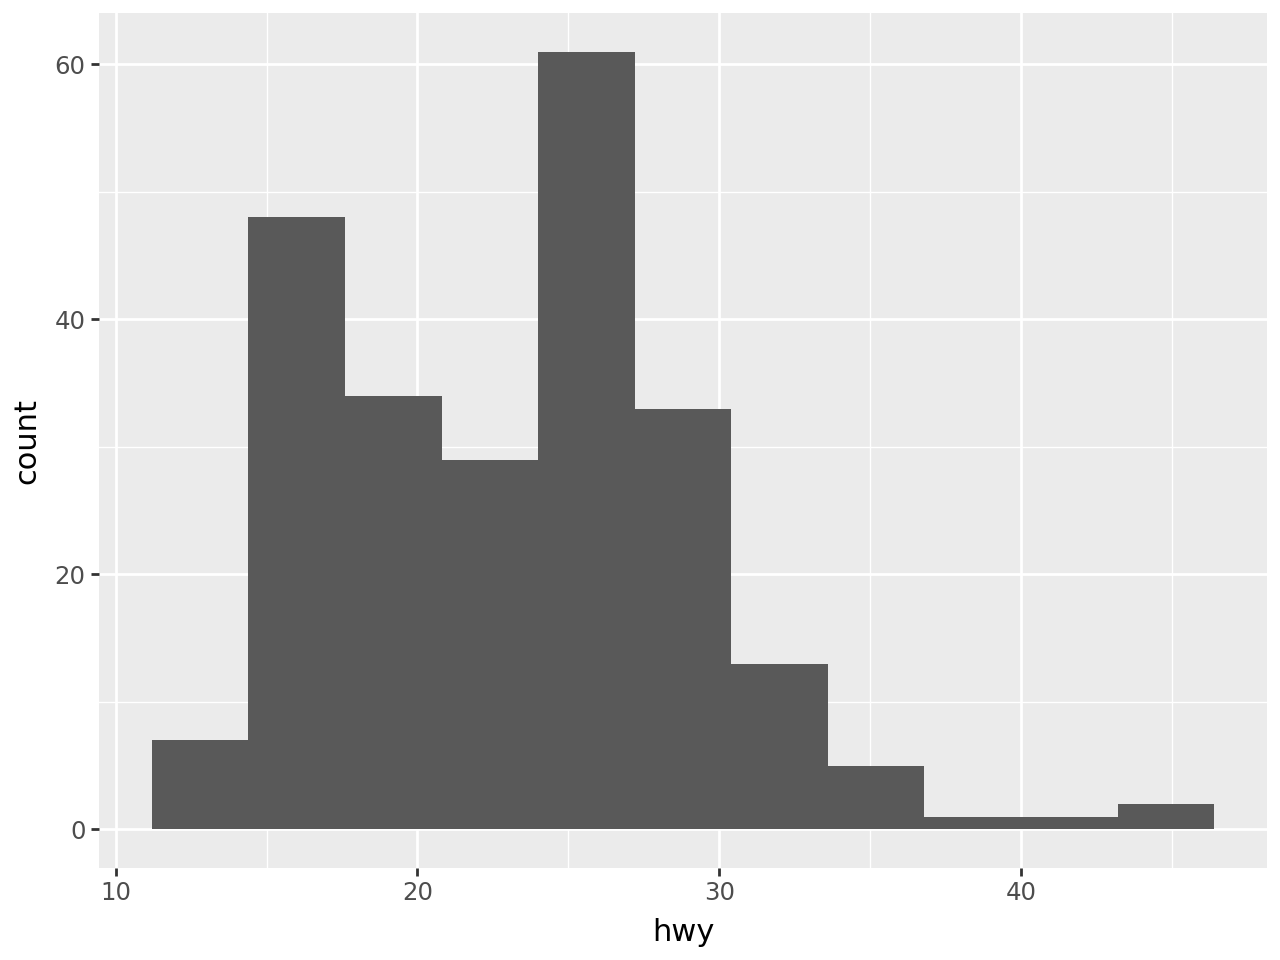

In [8]:
ggplot(mpg, aes(x="hwy")) + geom_histogram()

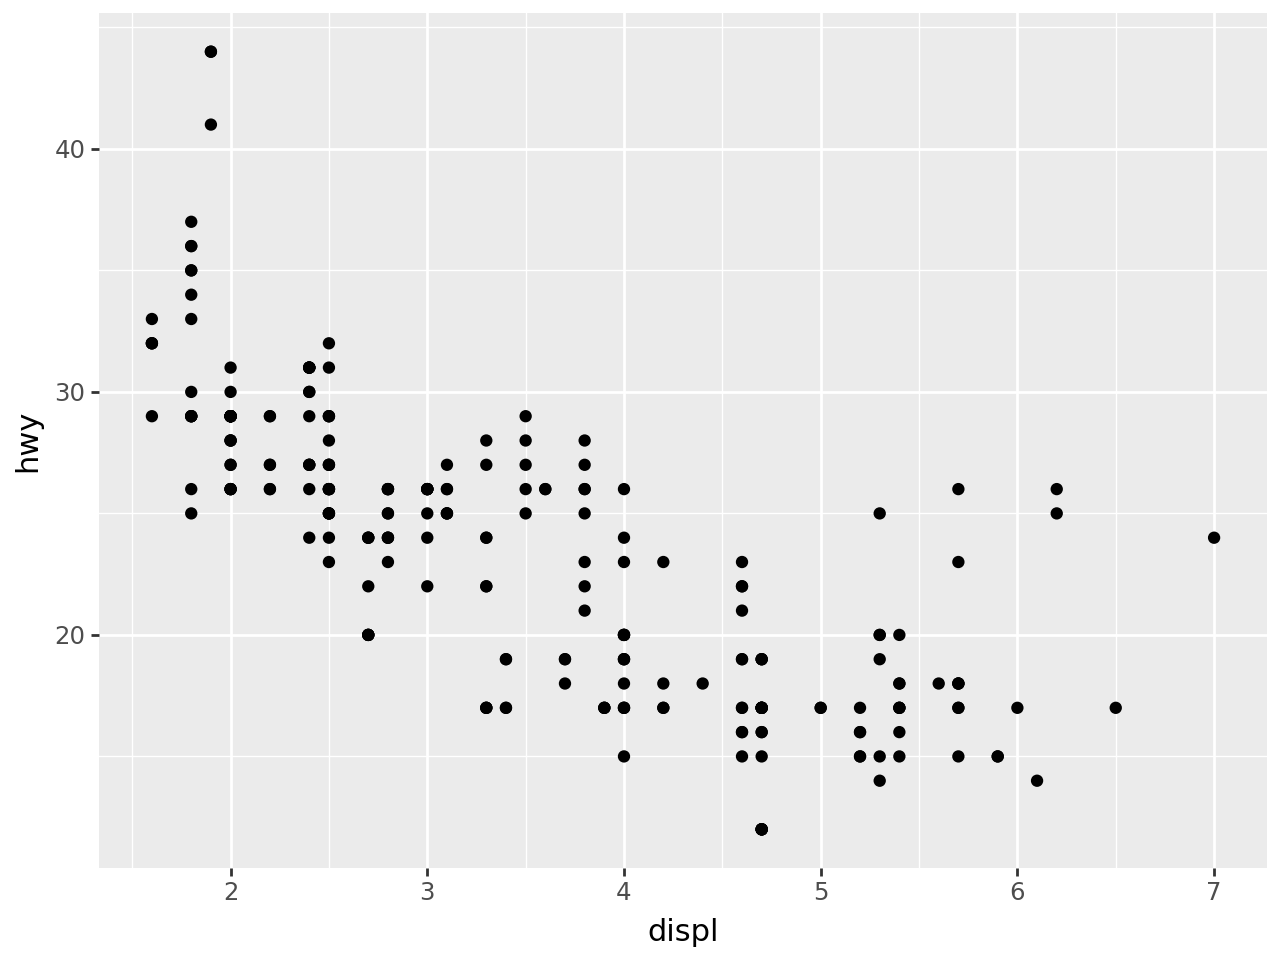

In [9]:
ggplot(mpg, aes(x = 'displ', y = 'hwy')) + geom_point()

Notice how the points seem to be aligned on a grid? That's because the data was rounded. If we want to better visualise the distribution of the points and avoid overlapping of points, we can use the "jitter" geometry instead, which gives the points a little shake:

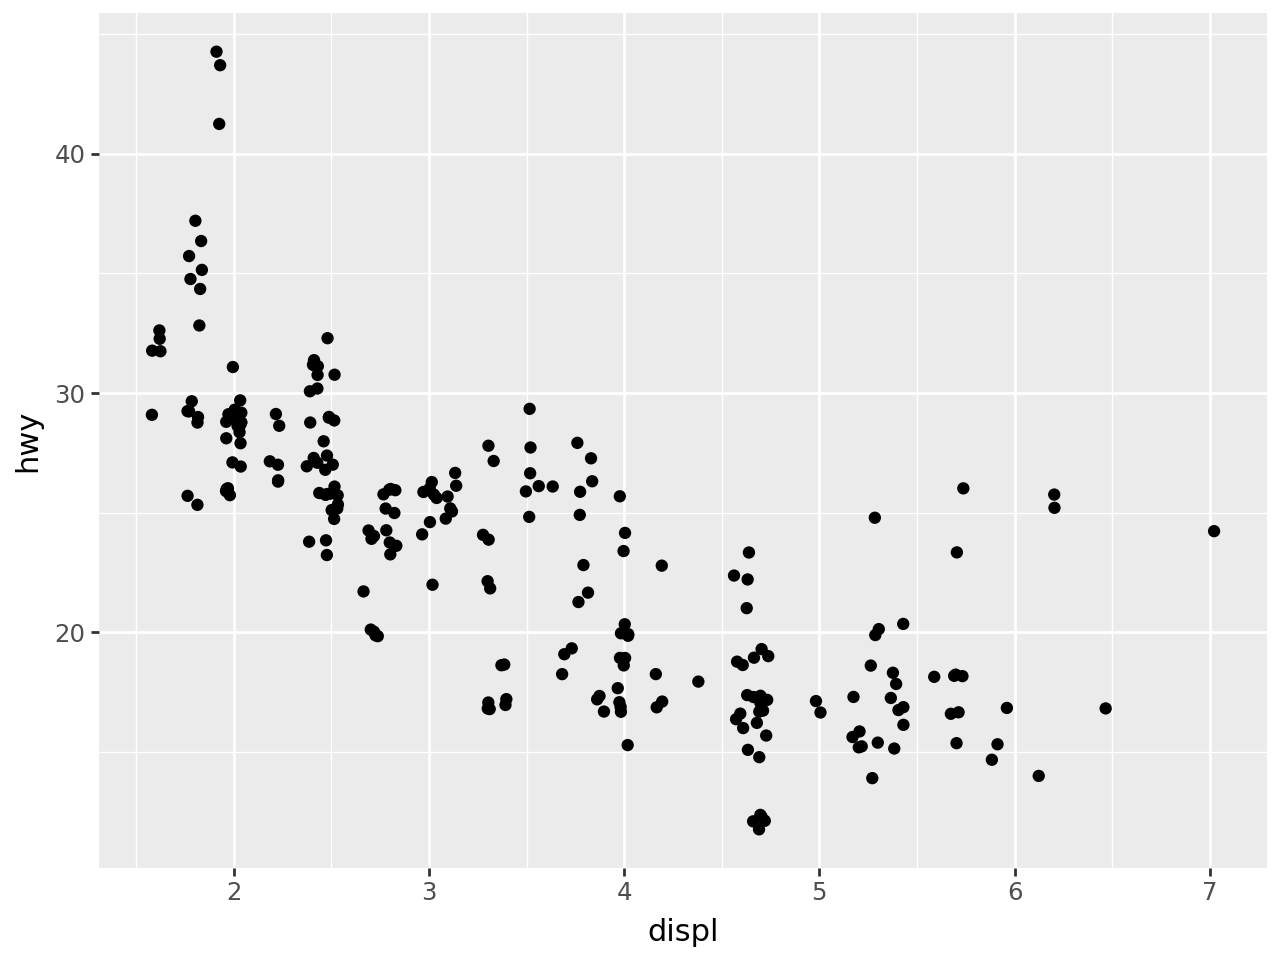

In [10]:
from plotnine import geom_jitter
ggplot(mpg, aes(x = 'displ', y = 'hwy')) + geom_jitter()

# Adding aesthetics

Further aesthetics link properties of the data to visual characteristics: for example, position, color, size, shape, or transparency.

All aesthetics for a plot are specified inside the `aes()` function in the first call to `ggplot()`. Individual geometry layers can have their own aesthetics too: more about this shortly.

In our previous scatterplot of `hwy` vs. `displ`, we can highlight the "class" factor by adding a new aesthetic:

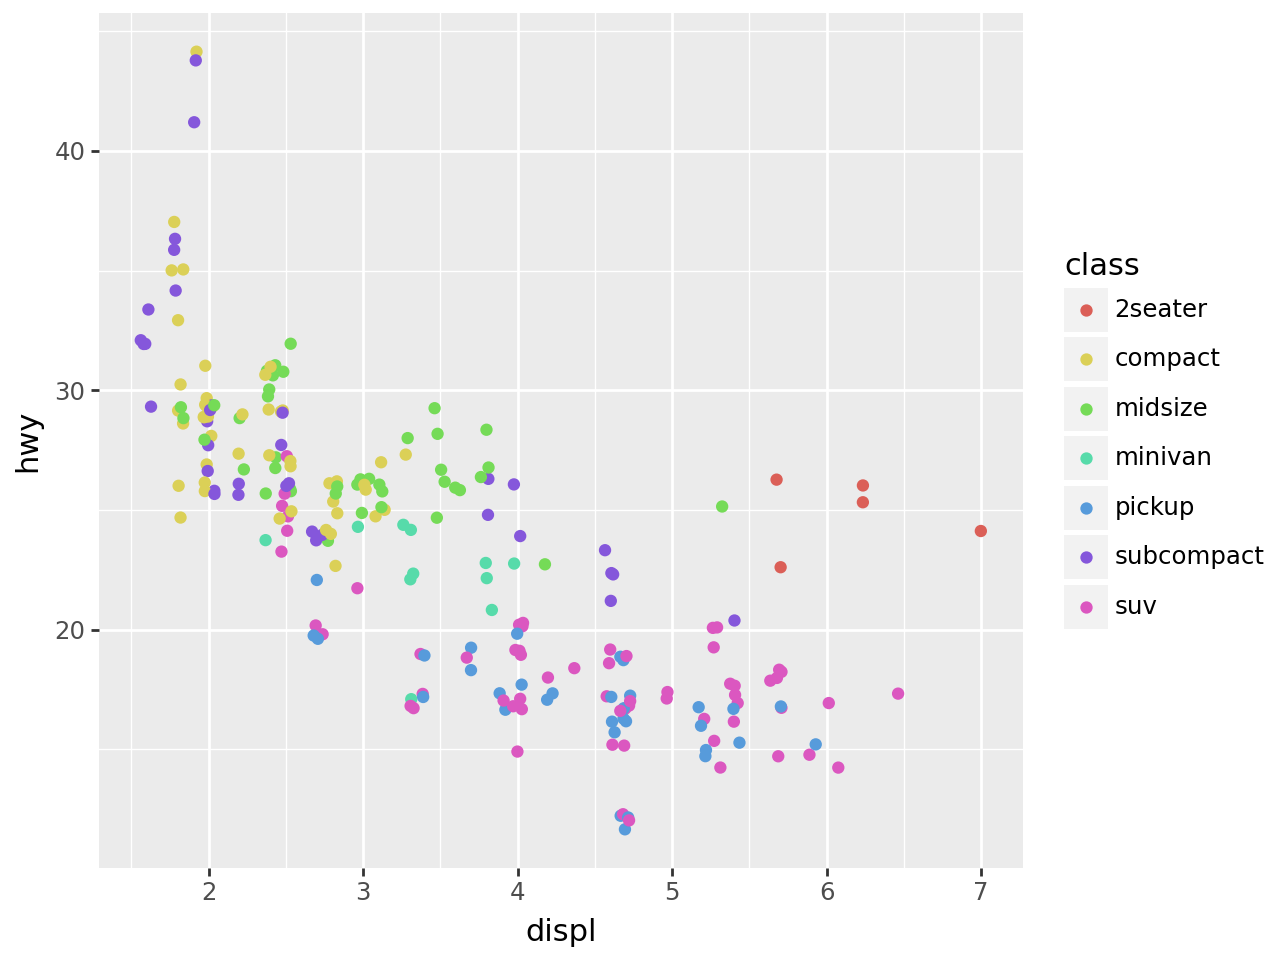

In [11]:
gg = ggplot(mpg, aes(x = "displ", y = "hwy", color = "class")) + geom_jitter()
gg.show()

As a bonus, the legend is added automatically. If needed, it can be removed by setting `legend.position=None` from within a `theme()` function:

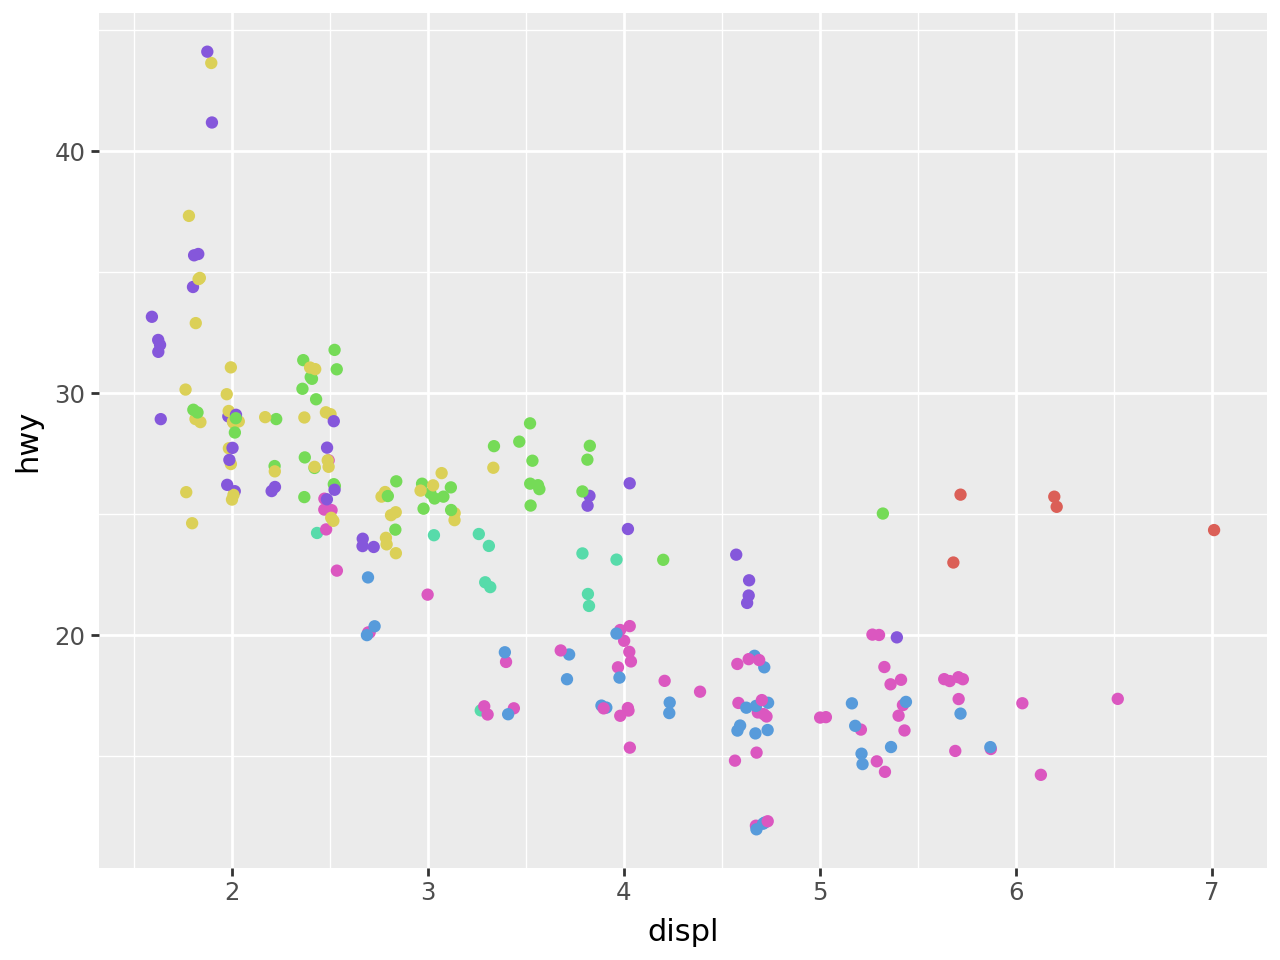

In [12]:
from plotnine import theme
gg + theme(legend_position="none")

Take a look at all the [theme](https://plotnine.org/reference/theme.html) Properties 

What happens if we specified `aes(color="blue")`?
ggplot(mpg, aes(x = "displ", y = "hwy", color = "blue")) + geom_jitter() will give an error! the correct way would be:

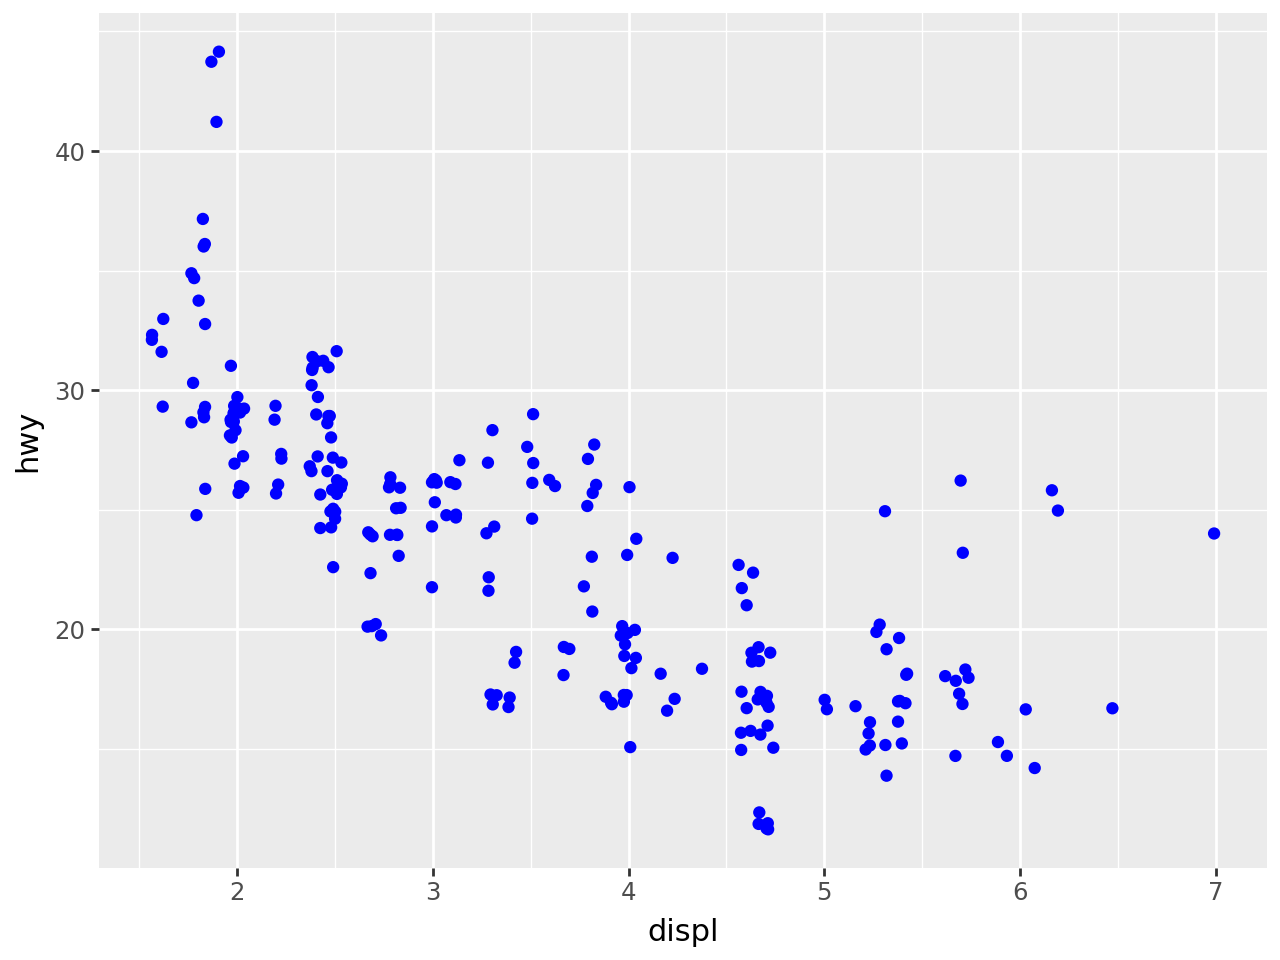

In [13]:
ggplot(mpg, aes(x = "displ", y = "hwy")) + geom_jitter(color="blue")

We now know how to create a simple scatterplot, and how to visualise extra variables. But how can we better represent a correlation?

# Trend lines

A trend line can be created with the `geom_smooth()` function:

/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


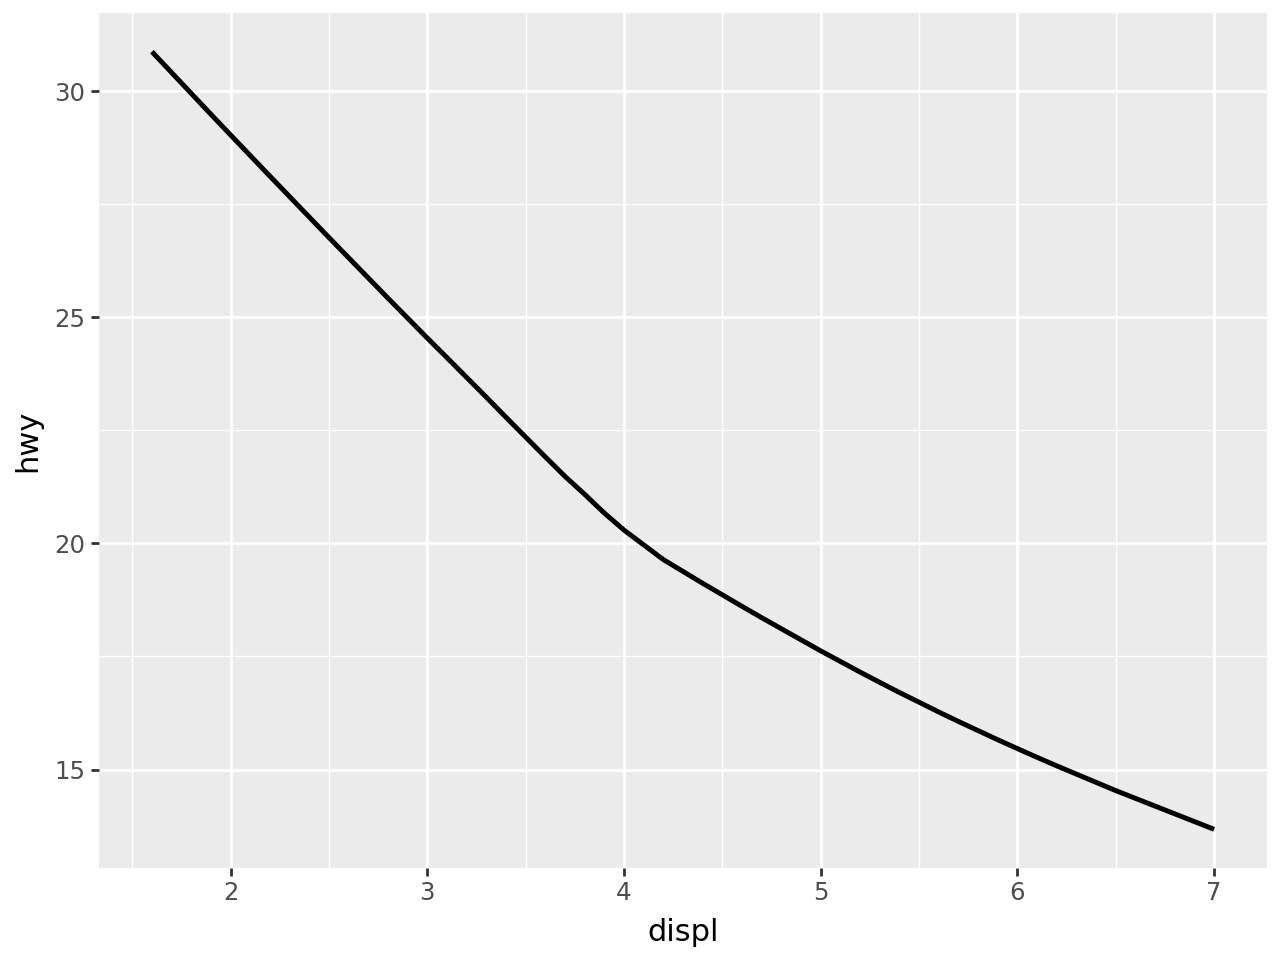

In [14]:
from plotnine import geom_smooth
ggplot(mpg, aes(x = "displ", y = "hwy")) + geom_smooth()

The console shows you what function / formula was used to draw the trend line (in this case, the loess method). This is important information, as there are countless ways to do that. To better understand what happens in the background, open the function's help page and notice that the default value for the `method` argument is "NULL". Read up on how it automatically picks a suitable method depending on the sample size, in the "Arguments" section.
Want a linear trend line instead? Add the argument `method = "lm"` to the smoothing function:


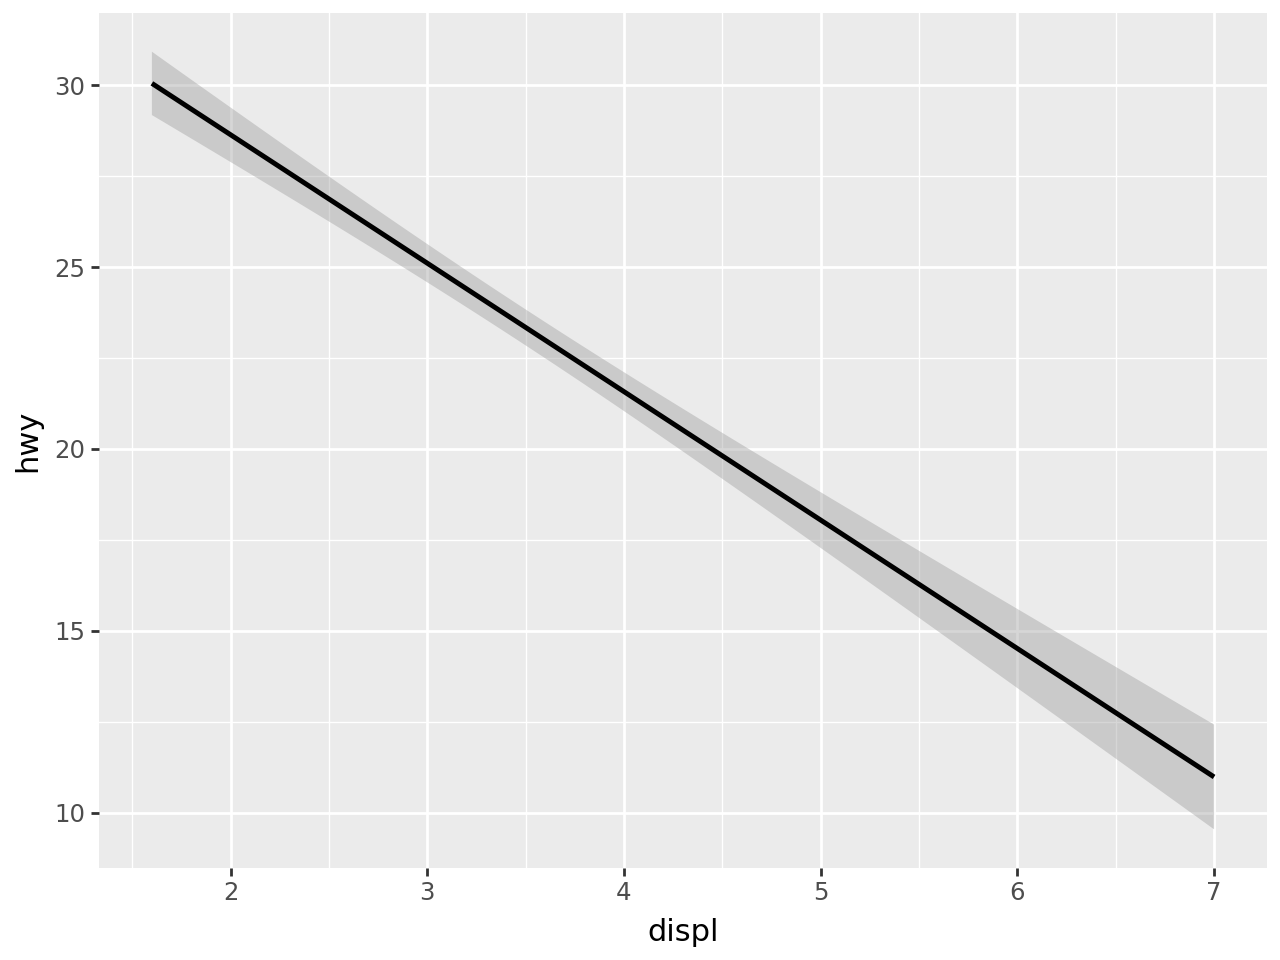

In [15]:
ggplot(mpg, aes(x = "displ", y = "hwy")) + geom_smooth(method = "lm")

# Layering

The power of ggplot2 is that you can add many different geometries to a plot!

A trend line is usually displayed on top of a scatterplot. You can combine ("add") several layers with the `+` operator:


/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


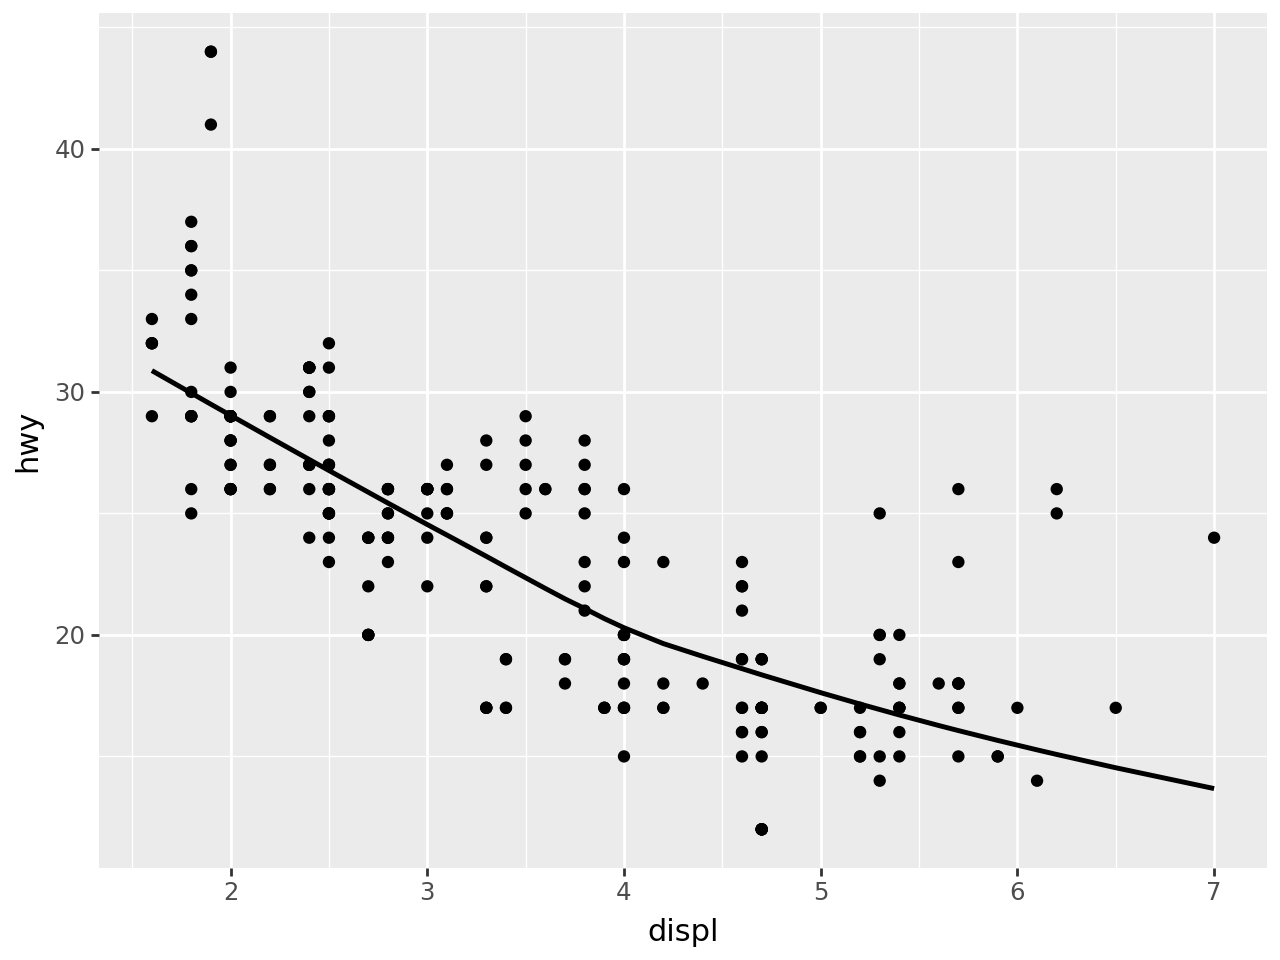

In [16]:
ggplot(mpg, aes(x = "displ", y = "hwy")) + geom_point() + geom_smooth()

The aesthetics for each `geom_` can be different, and you can also pass a different `data` argument to each `geom_` layer.

In the following example we specify different colors for the points and the smoothing line:

/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


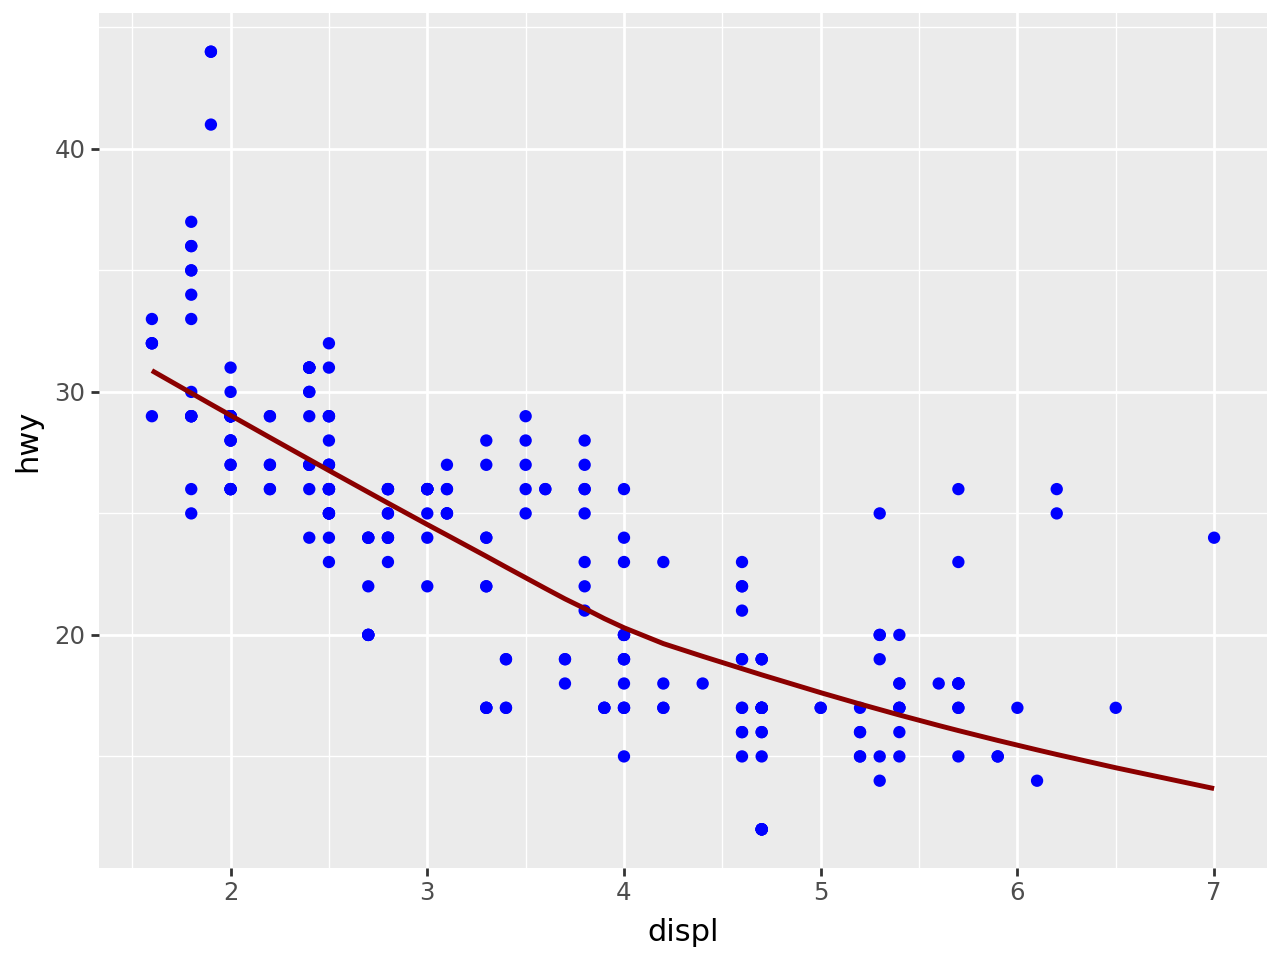

In [17]:
ggplot(mpg, aes(x = "displ", y = "hwy")) + geom_point(color="blue") + geom_smooth(color="darkred")

/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


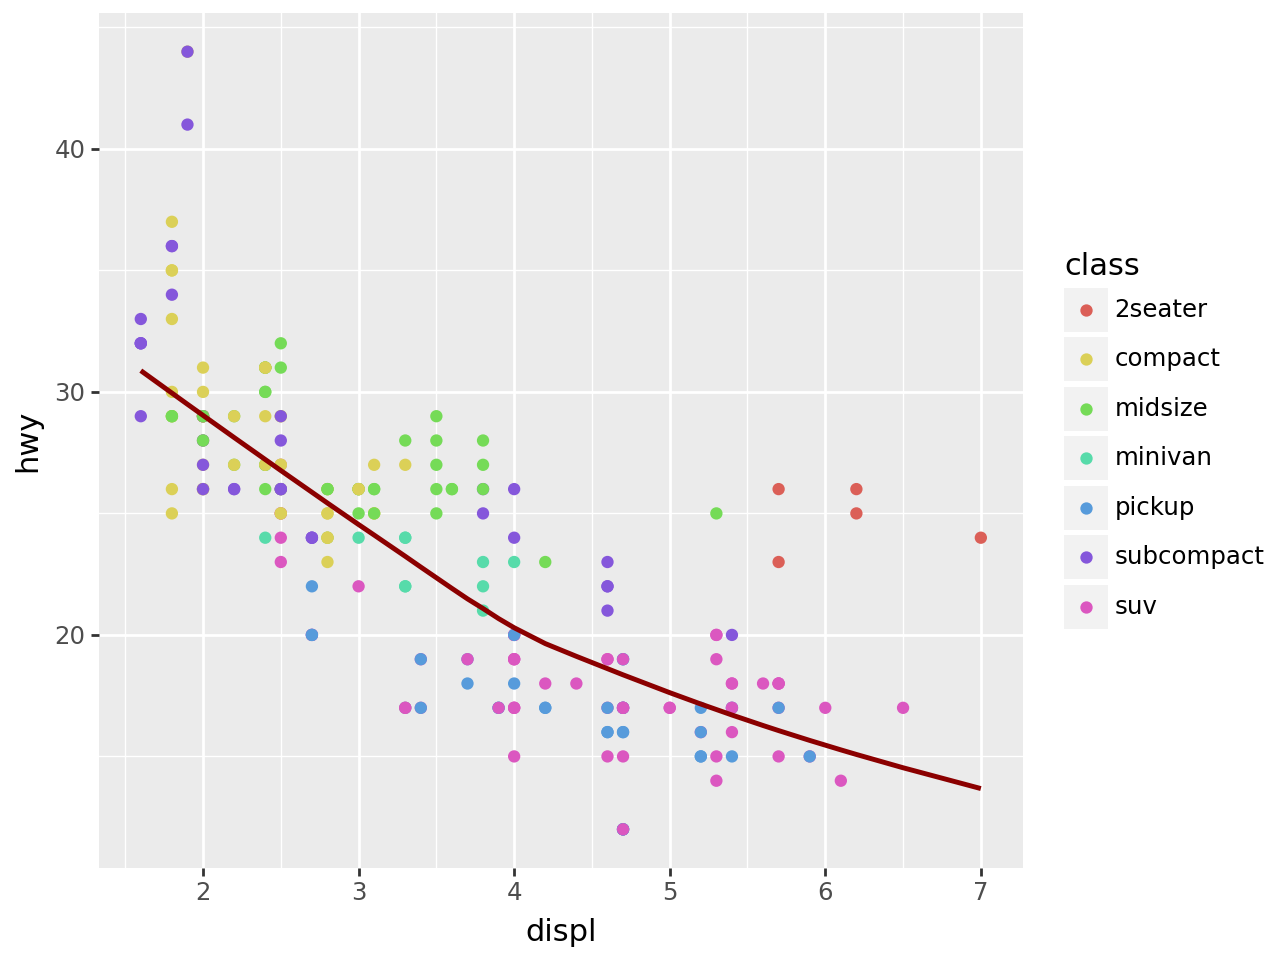

In [47]:
ggplot(mpg, aes(x = "displ", y = "hwy")) + geom_point(color="blue") + geom_smooth(color="darkred") + theme(legend_position="best")
# the legend is not displayed because it doesn't know on what it should be based. a solution is to set a color in aes so that the legend can base itself on
# such color

ggplot(mpg, aes(x = "displ", y = "hwy", color = "class")) + geom_point() + geom_smooth(color="darkred")

# Changing x and y axis limits

There are two ways to change x and y axis limits:

- With the layers `xlim(x1, x2)`, `ylim(y1, y2)`
- With the layer `coord_cartesian(xlim=(x1, x2), ylim=(y1, y2))`

They are not really equivalent!


/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 100 rows containing missing values.


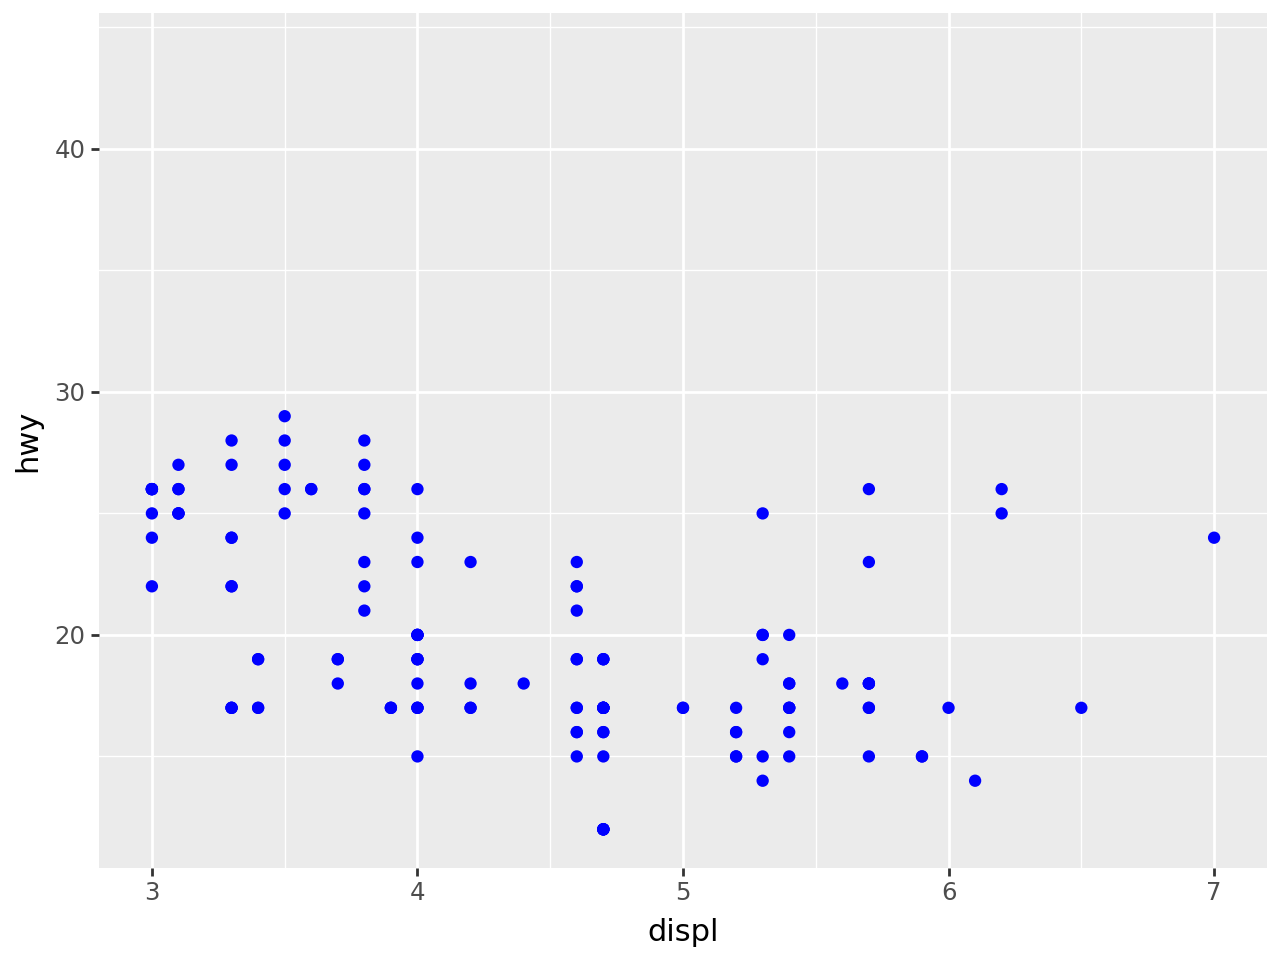

In [19]:
from plotnine import xlim
gg = ggplot(mpg, aes(x = "displ", y = "hwy")) + geom_point(color="blue")
gg + xlim(3, 7)

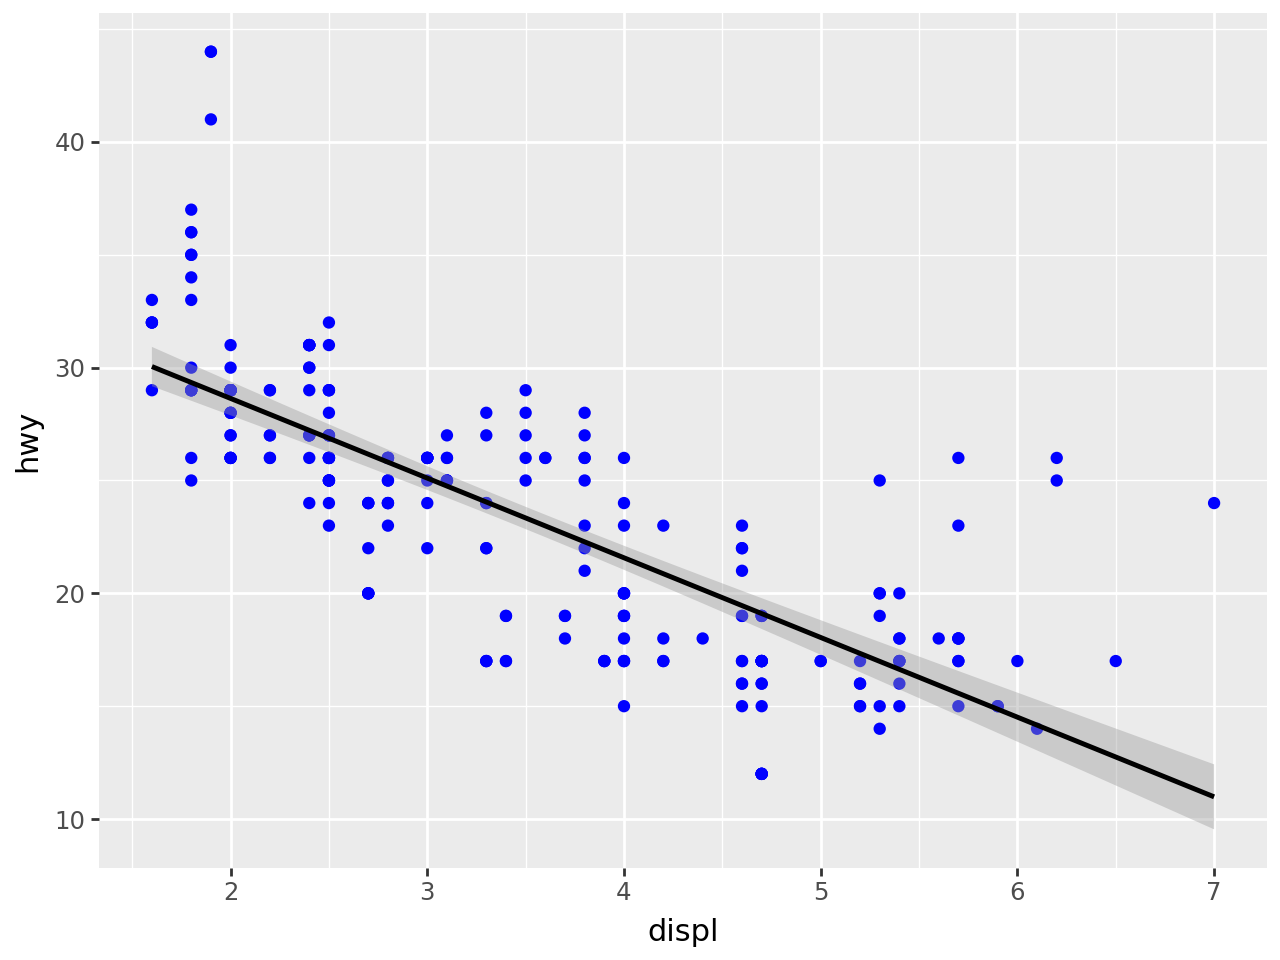

In [20]:
gg + geom_smooth(method="lm")

/home/dorijan/Desktop/dataviz/.venv/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 100 rows containing missing values.


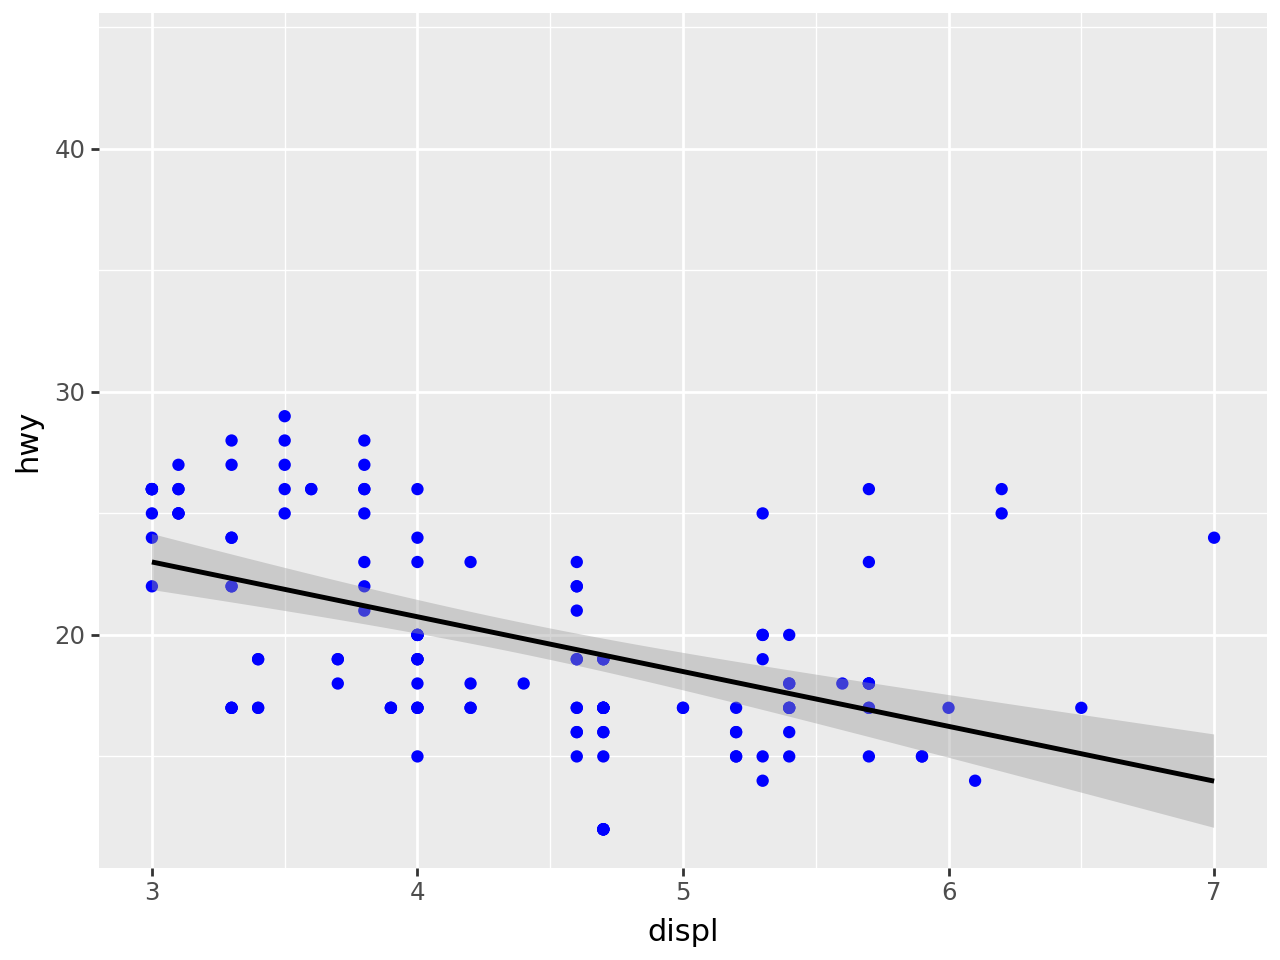

In [21]:
gg + geom_smooth(method="lm") + xlim(3, 7)

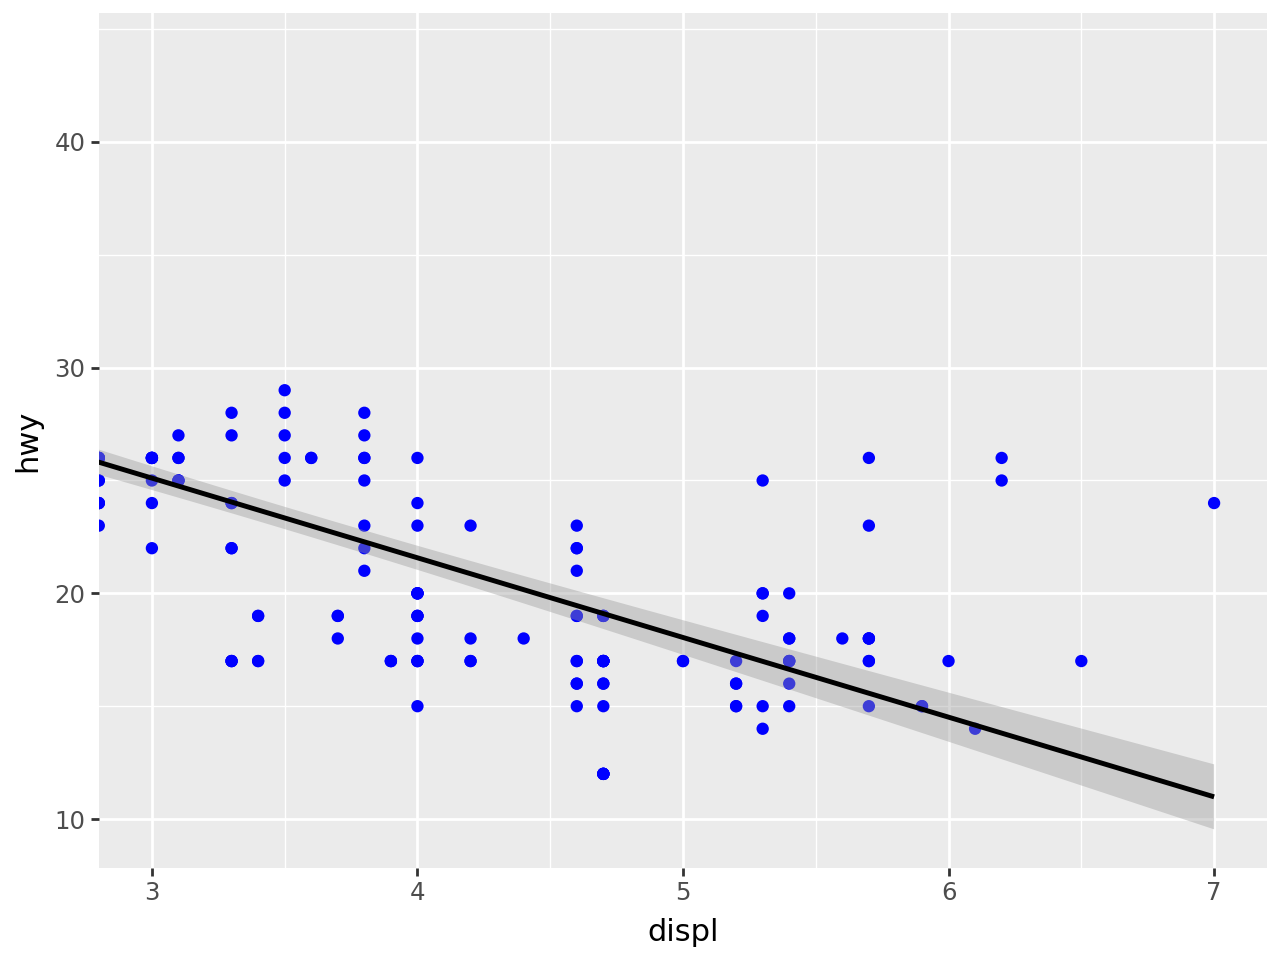

In [22]:
from plotnine import coord_cartesian
gg + geom_smooth(method="lm") + coord_cartesian(xlim=(3, 7))

So with `xlim()` and `ylim()` the points outside the specified range are deleted, thus actually changing the smoothing lines. This feature might come in handy when you wish to know how the line of best fit would change when some extreme values (or outliers) are removed.

With `coord_cartesian()`, instead, you zoom in to the region of interest without deleting the points.

# The `color` aesthetic

We can add further information to our visualisation by mapping the `class` variable to the `color` aesthetic:

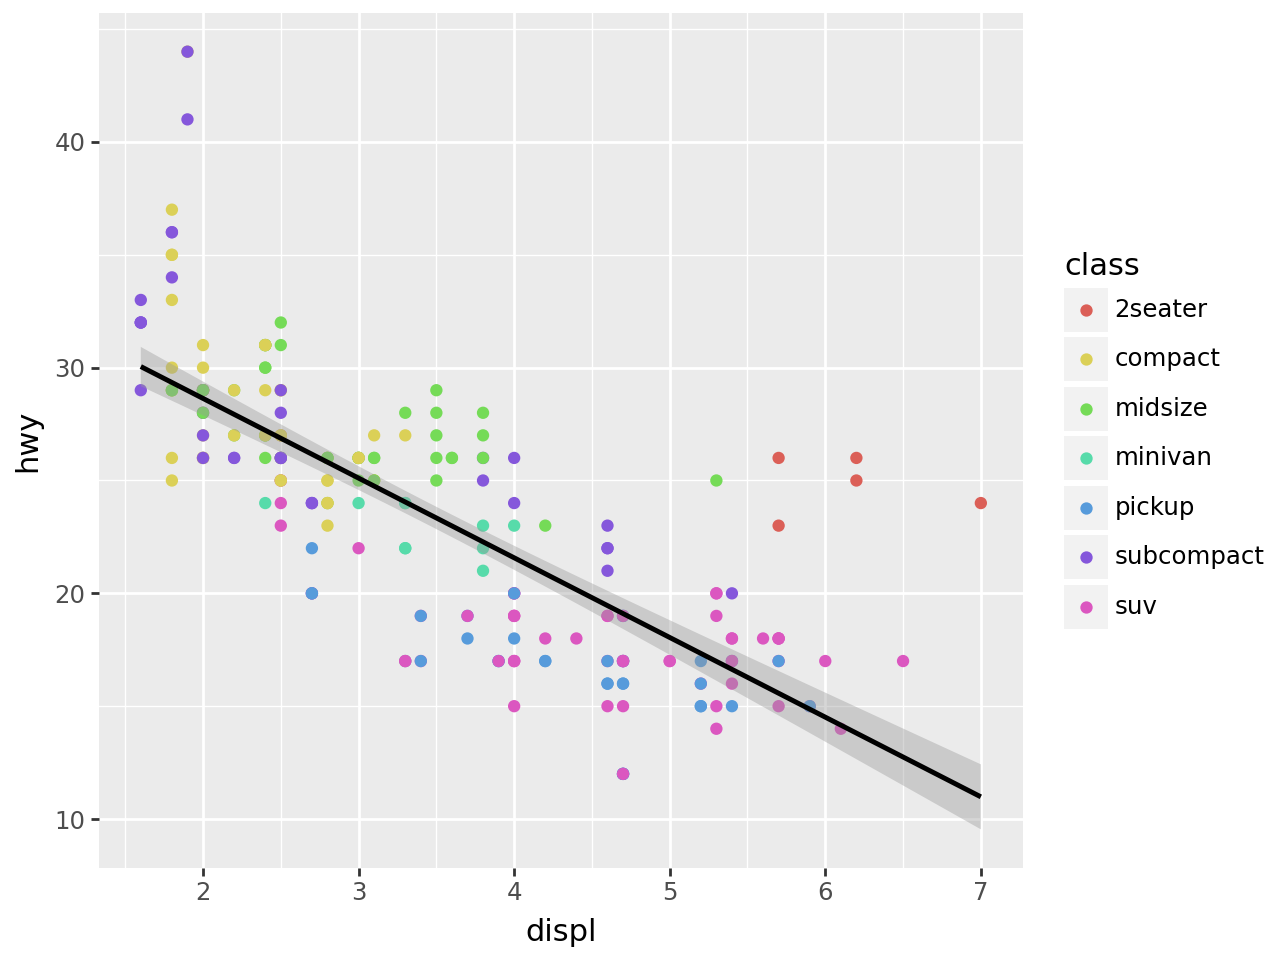

In [23]:
ggplot(mpg, aes(x = "displ", y = "hwy")) + geom_point(aes(color = "class")) + geom_smooth(method="lm")

## Where should aesthetics be defined?

Consider the last plot we created.

What would happen if you moved the `colour = class` aesthetic from the geometry function to the `ggplot()` call?

Different geometries can also have their own mappings that overwrite the defaults.
If you place mappings in a geom function, ggplot2 will treat them as local mappings for the layer. It will use these mappings to extend or overwrite the global mappings for that layer only. This makes it possible to display different aesthetics in different layers.

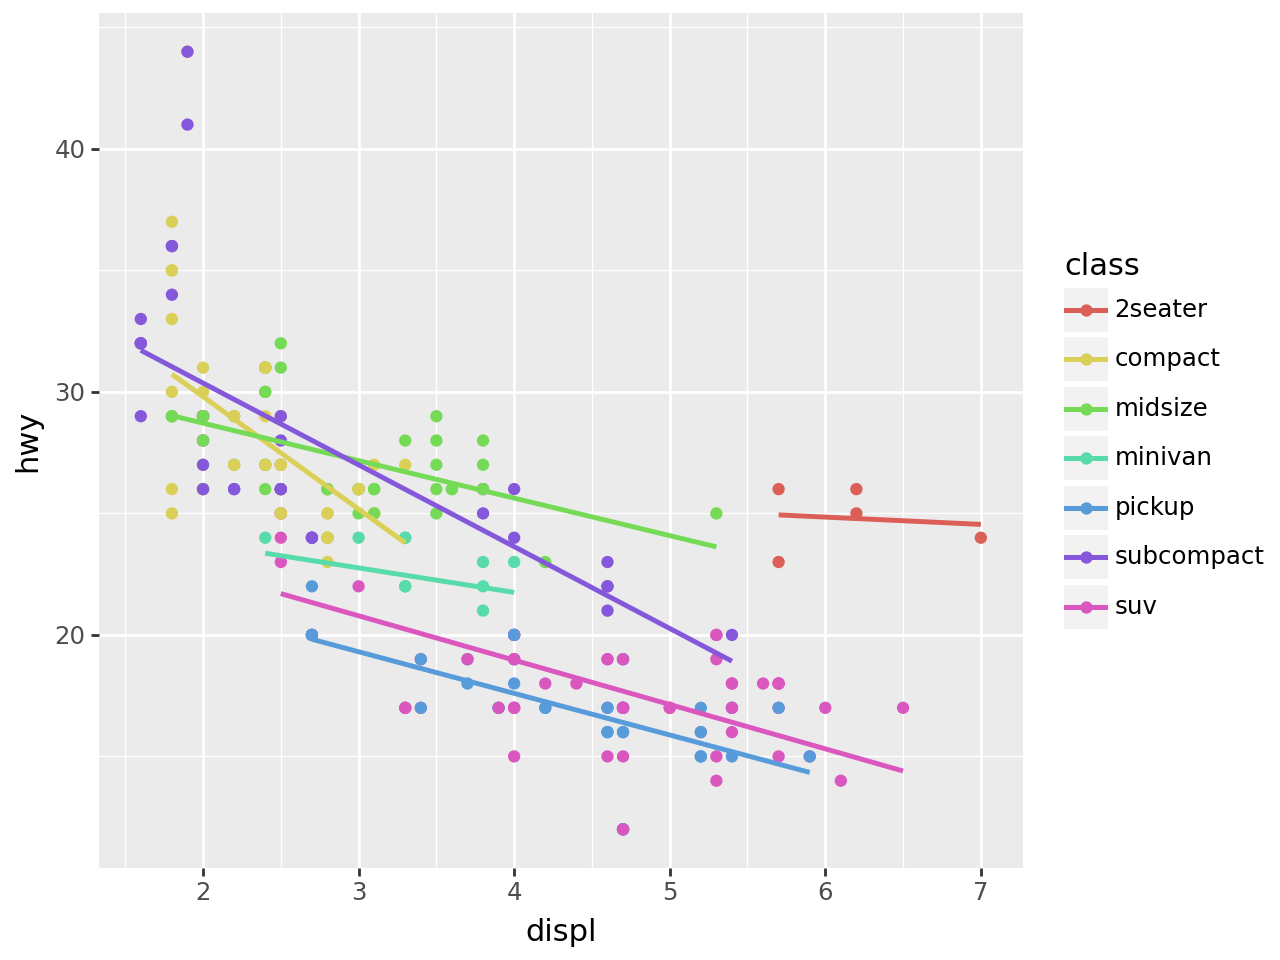

In [24]:
p1 = ggplot(mpg, aes(x = "displ", y = "hwy", color = "class"))
p1 + geom_point() + geom_smooth(se= False,method="lm")

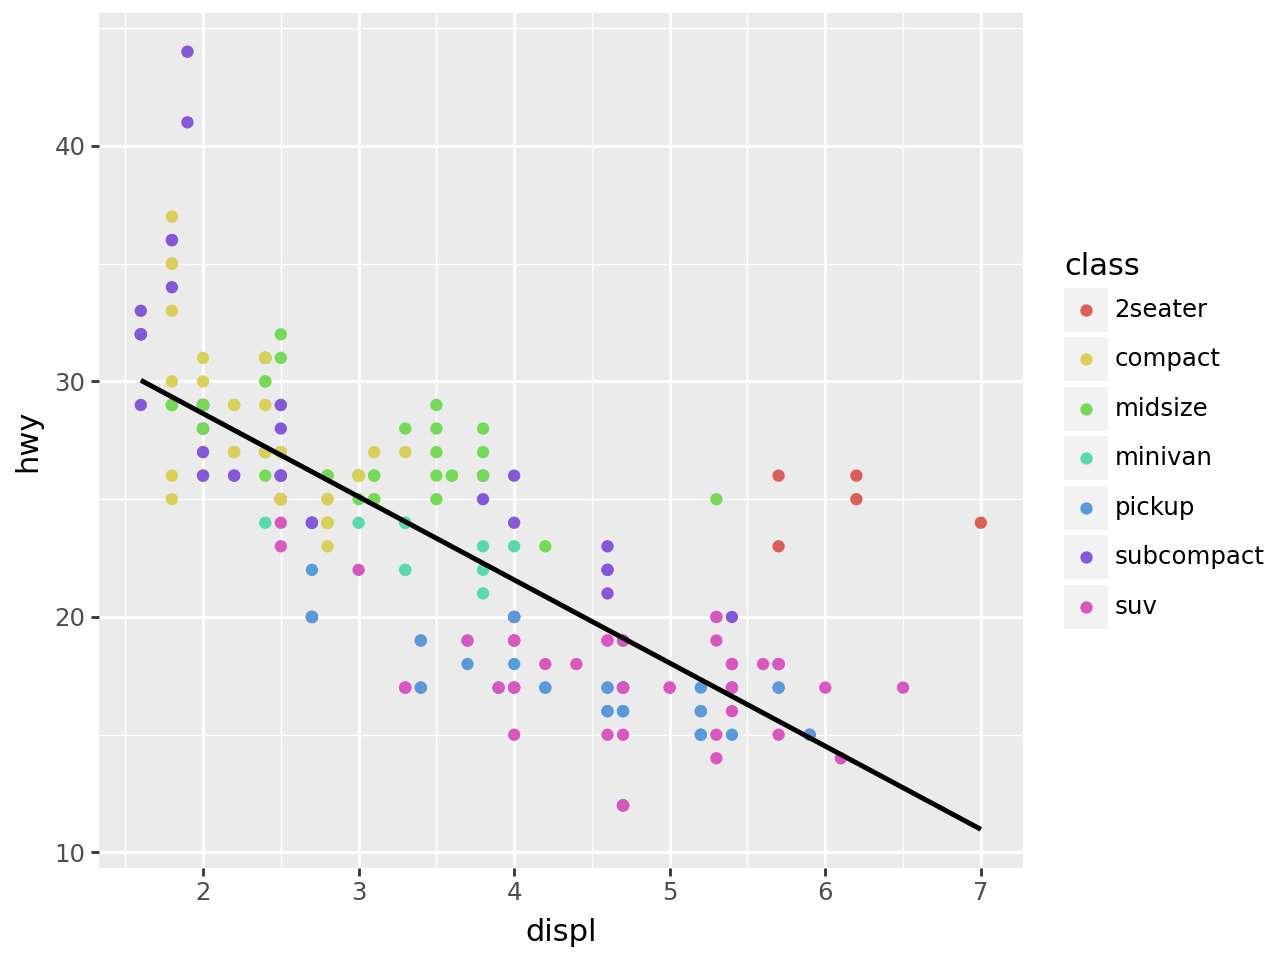

In [25]:
p1 = ggplot(mpg, aes(x = "displ", y = "hwy"))
p1 + geom_point(aes(color = "class")) + geom_smooth(se= False, color="black",method="lm")

-------------------------------------
### Exercise:
Load the economics data: 

`url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/economics.csv'`

`economics = pd.read_csv(url, index_col=0)`

and visualize the unemployment rate over time:

`ggplot(economics, aes(x = "date", y = "unemploy")) + geom_point()`

now:

1. Add a trend line for the number of unemployed people
2. Colour the points according to the median duration of unemployment
3. Consider the trend line: are you satisfied with the level of smoothness for this particular data? How could you make it more useful?


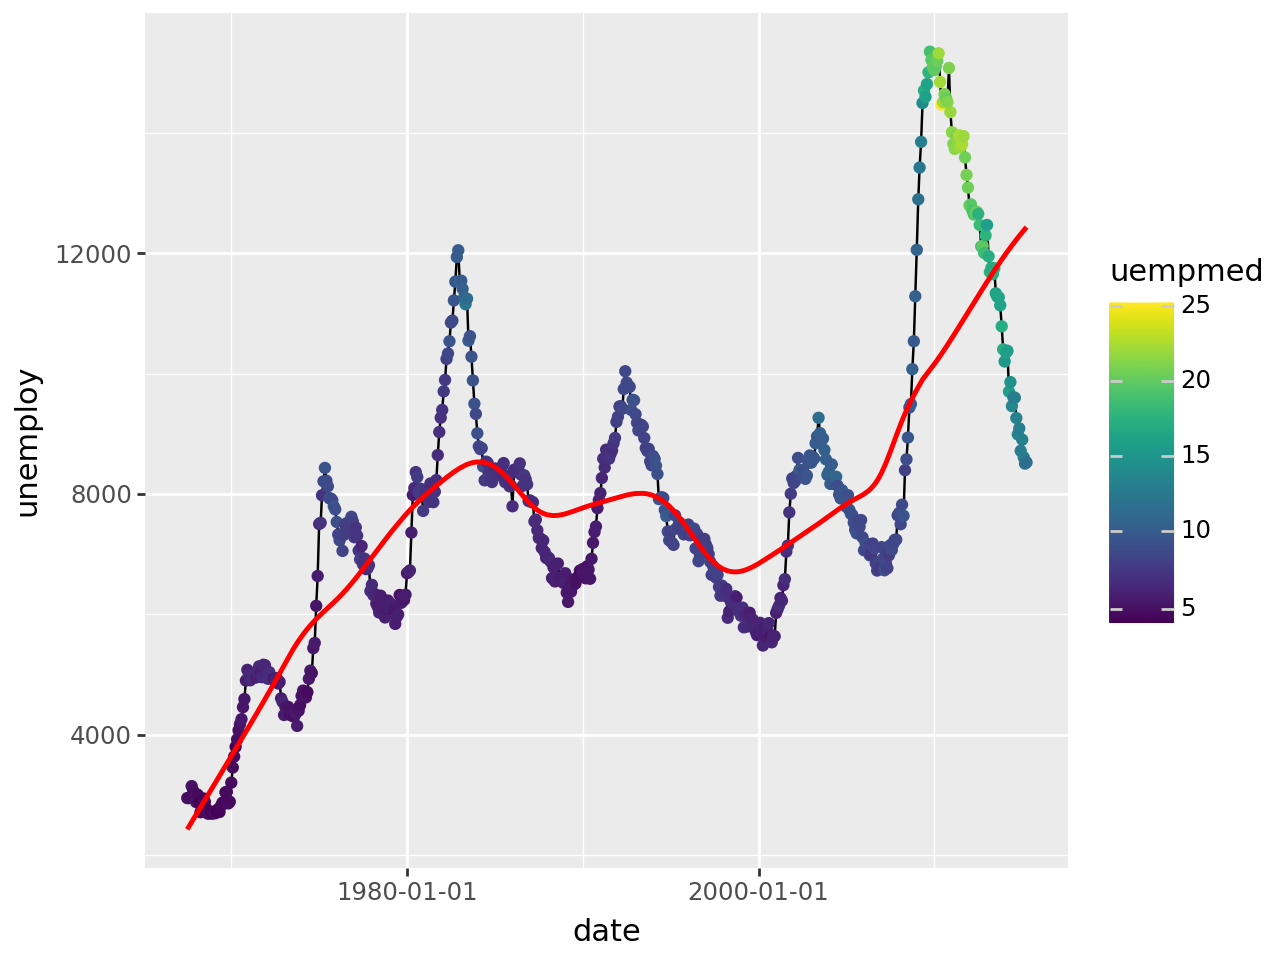

In [51]:
from plotnine import ggplot, aes, geom_line, geom_point, geom_smooth, theme
import pandas as pd

url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/ggplot2/economics.csv'
economics = pd.read_csv(url, index_col=0)

#convert the date column in an actual date format
economics['date'] = pd.to_datetime(economics['date'])

ggplot(economics, aes(x="date", y="unemploy")) + geom_line() + geom_point(aes(color="uempmed")) + geom_smooth(color="red", span=0.25, se=False)
#by setting a smaller span, we produce wigglier lines, larger numbers produce smoother lines.
#in this case, as we want to fit at best the data distribution, we lower the span value
#if the value is too low its like we overfit the distribution while with too large values we underfit

# Acknowledgements and sources

Stéphane Guillou (CC BY 4.0), Hadley Wickham (CC BY-NC-SA 4.0), Lisa Oswald and Tom Arend (MIT license).